In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import mode

## Train a decision tree

In [40]:
moons = datasets.make_moons(n_samples=10000, noise=0.4)
X = moons[0]
y = moons[1]

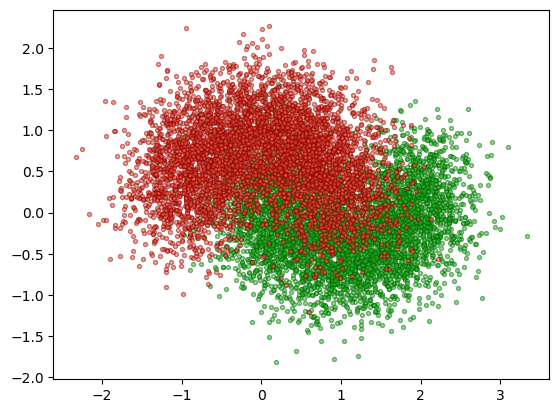

In [41]:
positive_class = X[y == 1]
negative_class = X[y == 0]

plt.scatter(positive_class[:, 0], positive_class[:, 1], color="limegreen", edgecolor="darkgreen", s=8, alpha=0.5)
plt.scatter(negative_class[:, 0], negative_class[:, 1], color="tomato", edgecolor="darkred", s=8, alpha=0.5)
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape:  {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape:  {y_test.shape}")

X_train.shape: (8000, 2)
X_test.shape:  (2000, 2)
y_train.shape: (8000,)
y_test.shape:  (2000,)


In [43]:
param_grid = {
    "max_leaf_nodes": list(range(2, 100)),
    "max_depth": list(range(1, 7)),
    "min_samples_split": [2, 3, 4],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [44]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator:  {grid_search.best_estimator_}")
print(f"Best score:      {grid_search.best_score_}")

Best parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(max_depth=6, max_leaf_nodes=14, random_state=42)
Best score:      0.8572522770737678


In [45]:
tree_clf = grid_search.best_estimator_
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=14, random_state=42)

In [46]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8475

## Grow a forest

In [61]:
n_trees = 1000
n_instances = 100

subsets = []

ss = ShuffleSplit(n_splits=n_trees, train_size=n_instances, random_state=42)
for train_index, test_index in ss.split(X_train, y_train):
    X_train_subset, y_train_subset = X_train[train_index], y_train[train_index]
    subsets.append((X_train_subset, y_train_subset))

In [64]:
forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_train_subset, y_train_subset) in zip(forest, subsets):
    tree.fit(X_train_subset, y_train_subset)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7923965000000001

In [66]:
predictions = np.empty(shape=[n_trees, len(X_test)], dtype=int)

for index, tree in enumerate(forest):
    predictions[index] = tree.predict(X_test)

In [68]:
majority_votes, n_votes = mode(predictions, axis=0)
accuracy_score(y_test, majority_votes.reshape(-1))

0.856